In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.integrate import odeint
from scipy.interpolate import interp1d
from tqdm import tqdm
import scipy
import spiceypy as spice
import rebound
import reboundx
import matplotlib
import pandas as pd
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

plt.rc_context({'figure.facecolor':'white'})

import sys
sys.path.append('..')
from geminids.constants import *
from geminids.weights import *



In [2]:
orbit = np.load('data/phaethon.npy')
psp2 = np.load('data/psp.npy')
t_act = np.load('data/t-3200.npy')
earth = spice.convrt(np.load('data/earth.npy'), "AU", "M")

In [3]:
spice.furnsh("data/meta.tm")

In [4]:
points1 = []
n = 100
mass = 0

for i in tqdm(range(n)):
    data = np.load(f'../output/novel/particles{i}.npy')
    beta = np.load(f'../output/novel/beta{i}.npy')
    size = np.load(f'../output/novel/mass{i}.npy')
    size = np.array(asteroidal(beta))
    mass += np.sum(size[(~np.isnan(size * weight_novel(beta)))] * 
                   weight_novel(beta[(~np.isnan(size * weight_novel(beta)))]))
    
    data = data.reshape(10000*100*2, 5)
    data = data[:,:3]
    
    
    
    points1.append(np.hstack((data, np.tile(size,20000).reshape(2000000,1), 
                              np.tile(weight_novel(beta),20000).reshape(2000000,1))))

mass = mass * 20000    
points1 = np.array(points1)
points1 = points1.reshape(2000000*n,5)
points1 = points1[~np.isnan(points1).any(axis=1)]
norm1 = 1e14/mass


  0%|          | 0/100 [00:00<?, ?it/s]../geminids/beta2mass.py:30: RuntimeWarning: divide by zero encountered in double_scalars
  return a* x**-b
<ipython-input-4-8857da933a6b>:10: RuntimeWarning: invalid value encountered in multiply
  mass += np.sum(size[(~np.isnan(size * weight_novel(beta)))] *
<ipython-input-4-8857da933a6b>:11: RuntimeWarning: invalid value encountered in multiply
  weight_novel(beta[(~np.isnan(size * weight_novel(beta)))]))
100%|██████████| 100/100 [02:17<00:00,  1.38s/it]


In [5]:
CUTOFF = 1.8e-4
# CUTOFF = 1e-5

In [6]:
d = np.sqrt(points1[:,0]**2 + points1[:,1]**2 + points1[:,2]**2)

points1 = points1[np.logical_not(np.logical_or(d > 1.1, d < 0.9))]

points_m4 = points1[:,:][points1[:,3] > CUTOFF]
points_m7 = points1[:,:][points1[:,3] > 1e-7]

particles_m4_nv = scipy.spatial.KDTree(points_m4[~np.isnan(points_m4).any(axis=1)][:,:3])
particles_m7_nv = scipy.spatial.KDTree(points_m7[~np.isnan(points_m7).any(axis=1)][:,:3])

In [7]:
points1c = []
n = 100
massc = 0

for i in tqdm(range(n)):
    data = np.load(f'../output/novel_comet/particles{i}.npy')
    beta = np.load(f'../output/novel_comet/beta{i}.npy')
    size = np.load(f'../output/novel_comet/mass{i}.npy')
    size = np.array(young_comet(beta))
    massc += np.sum(size[(~np.isnan(size * weight_novelc(beta)))] * 
                    weight_novelc(beta[(~np.isnan(size * weight_novelc(beta)))]))
    
    data = data.reshape(10000*100*2, 5)
    data = data[:,:3]
    
#     data[:,2] -= offset(data[:,1])
    
    
    points1c.append(np.hstack((data, np.tile(size,20000).reshape(2000000,1), 
                               np.tile(weight_novelc(beta),20000).reshape(2000000,1))))

massc = massc * 20000    
points1c = np.array(points1c)
points1c = points1c.reshape(2000000*n,5)
points1c = points1c[~np.isnan(points1c).any(axis=1)]
norm1c = 1e14/mass
# norm = 2.5e27/20000000

100%|██████████| 100/100 [01:32<00:00,  1.08it/s]


In [8]:
d = np.sqrt(points1c[:,0]**2 + points1c[:,1]**2 + points1c[:,2]**2)

points1c = points1c[np.logical_not(np.logical_or(d > 1.1, d < 0.9))]

points_m4c = points1c[:,:][points1c[:,3] > CUTOFF]
points_m7c = points1c[:,:][points1c[:,3] > 1e-7]

particles_m4_nvc = scipy.spatial.KDTree(points_m4c[~np.isnan(points_m4c).any(axis=1)][:,:3])
particles_m7_nvc = scipy.spatial.KDTree(points_m7c[~np.isnan(points_m7c).any(axis=1)][:,:3])

In [9]:
points1o = []
n = 100
masso = 0
offset = 0
for i in tqdm(range(n)):
    try :
        data = np.load(f'../output/novel_old/particles{i}.npy')
        beta = np.load(f'../output/novel_old/beta{i}.npy')
        size = np.load(f'../output/novel_old/mass{i}.npy')
        masso += np.sum(size[(~np.isnan(size * weight_novel(beta)))] * 
                        weight_novel(beta[(~np.isnan(size * weight_novel(beta)))]))

        data = data.reshape(10000*100*2, 5)
        data = data[:,:3]

 

        points1o.append(np.hstack((data, np.tile(size,20000).reshape(2000000,1), 
                                   np.tile(weight_novel(beta),20000).reshape(2000000,1))))
    except Exception as e: 
        print(e)
        offset += 1
        
masso = masso * 20000    
points1o = np.array(points1o)
points1o = points1o.reshape(2000000*(n-offset),5)
points1o = points1o[~np.isnan(points1o).any(axis=1)]
norm1o = 1e14/masso


 22%|██▏       | 22/100 [00:29<01:54,  1.46s/it]

[Errno 2] No such file or directory: '../output/novel_old/particles22.npy'


100%|██████████| 100/100 [02:09<00:00,  1.30s/it]


In [10]:
d = np.sqrt(points1o[:,0]**2 + points1o[:,1]**2 + points1o[:,2]**2)

points1o = points1o[np.logical_not(np.logical_or(d > 1.1, d < 0.9))]

points_m4o = points1o[:,:][points1o[:,3] > CUTOFF]
points_m7o = points1o[:,:][points1o[:,3] > 1e-7]

particles_m4_nvo = scipy.spatial.KDTree(points_m4o[~np.isnan(points_m4o).any(axis=1)][:,:3])
particles_m7_nvo = scipy.spatial.KDTree(points_m7o[~np.isnan(points_m7o).any(axis=1)][:,:3])

In [11]:
points2 = []
n=100
mass_v = 0
for i in tqdm(range(n)):
    data = np.load(f'../output/vel/particles{i}.npy')
    beta = np.load(f'../output/vel/beta{i}.npy')
    size = np.load(f'../output/vel/mass{i}.npy')
    size = asteroidal(beta)
    
    data = data.reshape(10000*100*2, 5)
    data = data[:,:3]
    mass_v += np.sum(size[(~np.isnan(size * weight_vel(beta)))] * weight_vel(beta[(~np.isnan(size * weight_vel(beta)))]))

    
    points2.append(np.hstack((data, np.tile(size,20000).reshape(2000000,1), np.tile(weight_vel(beta),20000).reshape(2000000,1))))
    
mass_v *= 20000
points2 = np.array(points2)
points2 = points2.reshape(2000000*n,5)




100%|██████████| 100/100 [02:09<00:00,  1.30s/it]


In [12]:
d = np.sqrt(points2[:,0]**2 + points2[:,1]**2 + points2[:,2]**2)


points2 = points2[np.logical_not(np.logical_or(d > 1.1, d < 0.9))]

points_m4v = points2[points2[:,3] > CUTOFF]
points_m7v = points2[points2[:,3] > 1e-7]

particles_m4_v = scipy.spatial.KDTree(points_m4v[:,:3])
particles_m7_v = scipy.spatial.KDTree(points_m7v[:,:3])

<ipython-input-12-4e81eac076a1>:4: RuntimeWarning: invalid value encountered in greater
  points2 = points2[np.logical_not(np.logical_or(d > 1.1, d < 0.9))]
<ipython-input-12-4e81eac076a1>:4: RuntimeWarning: invalid value encountered in less
  points2 = points2[np.logical_not(np.logical_or(d > 1.1, d < 0.9))]


In [13]:
# points3 = []
# n=600
# a = np.array(range(n))
# # a = np.delete(a, (431, 578))
# # n -= 2
# offset = 0
# for i in tqdm(range(n)):
#         try:
#             data = np.load(f'../output/distr/particles{i}.npy')
#             beta = np.load(f'../output/distr/beta{i}.npy')
#             size = np.load(f'../output/distr/mass{i}.npy')

#             data = data.reshape(10000*10*2, 5)
#             data[data[:,4] < .2] *= 0
#             data = data[:,:3]

#         #     data[:,2] -= offset(data[:,1])


#             points3.append(np.hstack((data, np.tile(size,20000).reshape(200000,1), np.tile(beta,20000).reshape(200000,1))))
#         except: offset +=1
        
# points3 = np.array(points3)
# points3 = points3.reshape(200000*(n - offset),5)
# points3 = points3[~np.isnan(points3).any(axis=1)]

# mass_d = np.sum(points3[:,3])



In [14]:
# np.min(points3[:,3])

In [15]:
# d = np.sqrt(points3[:,0]**2 + points3[:,1]**2 + points3[:,2]**2)


# points3 = points3[np.logical_not(np.logical_or(d > 1.1, d < 0.9))]

# particles_m4_d = scipy.spatial.KDTree(points3[:,:3][points3[:,3] > 1e-5])
# particles_m7_d = scipy.spatial.KDTree(points3[:,:3][points3[:,3] > 1e-7])

In [16]:
RADIUS_EARTH = 384.4e6 #m
a = 800
m = 10
n=a*m
pos_arr = np.zeros((n,3))

n_part_m4_v = np.zeros(n)
r_m4_v = np.zeros(n)

n_part_m7_v = np.zeros(n)
r_m7_v = np.zeros(n)

n_part_m4_nv = np.zeros(n)
r_m4_nv = np.zeros(n)

n_part_m7_nv = np.zeros(n)
r_m7_nv = np.zeros(n)

# n_part_m4_d = np.zeros(n)
# r_m4_d = np.zeros(n)

# n_part_m7_d = np.zeros(n)
# r_m7_d = np.zeros(n)

n_part_m4_nvc = np.zeros(n)
r_m4_nvc = np.zeros(n)

n_part_m7_nvc = np.zeros(n)
r_m7_nvc = np.zeros(n)

n_part_m4_nvo = np.zeros(n)
r_m4_nvo = np.zeros(n)

n_part_m7_nvo = np.zeros(n)
r_m7_nvo = np.zeros(n)




n_part_distr = np.zeros(n)
r_distr = np.zeros(n)

r = .05

t = t_act[np.linspace(0,19999, n, dtype=int)]
long = np.zeros(t.shape[0])

for i,j in enumerate(tqdm(np.linspace(0,19999, n, dtype=int))):
    [pos, lt] = spice.spkezr("EARTH", t_act[j], "J2000", "NONE", "SUN")

    
    pos = spice.convrt(pos, "KM", "AU")
    pos_arr[i] = pos[:3]


#     n_part_m4_v[i] = len(particles_m4_v.query_ball_point(pos[:3], r))
#     n_part_m7_v[i] = len(particles_m7_v.query_ball_point(pos[:3], r))

#     idxes1 = particles_m7_nv.query_ball_point(pos[:3], r)
#     if idxes1: n_part_m7_nv[i] = np.sum(pts1[idxes1][:,3] > 1e-5)
        
        
#     n_part_distr[i] = len(particles3.query_ball_point(pos[:3], r))

    n_part_m4_nv[i] = np.sum(points_m4[particles_m4_nv.query_ball_point(pos[:3], r), 4])
    n_part_m7_nv[i] = np.sum(points_m7[particles_m7_nv.query_ball_point(pos[:3], r),4])

    n_part_m4_v[i] = np.sum(points_m4v[particles_m4_v.query_ball_point(pos[:3], r), 4])
    n_part_m7_v[i] = np.sum(points_m7v[particles_m7_v.query_ball_point(pos[:3], r),4])
    
    n_part_m4_nvc[i] = np.sum(points_m4c[particles_m4_nvc.query_ball_point(pos[:3], r), 4])
    n_part_m7_nvc[i] = np.sum(points_m7c[particles_m7_nvc.query_ball_point(pos[:3], r),4])
    
    n_part_m4_nvo[i] = np.sum(points_m4o[particles_m4_nvo.query_ball_point(pos[:3], r), 4])
    n_part_m7_nvo[i] = np.sum(points_m7o[particles_m7_nvo.query_ball_point(pos[:3], r),4])
#     n_part_m4_nvc[i] = len(particles_m4_nvc.query_ball_point(pos[:3], r))
#     n_part_m7_nvc[i] = len(particles_m7_nvc.query_ball_point(pos[:3], r))

#     n_part_m4_nvo[i] = len(particles_m4_nvo.query_ball_point(pos[:3], r))
#     n_part_m7_nvo[i] = len(particles_m7_nvo.query_ball_point(pos[:3], r))
    
#     n_part_m4_d[i] = len(particles_m4_d.query_ball_point(pos[:3], r))
#     n_part_m7_d[i] = len(particles_m7_d.query_ball_point(pos[:3], r))
    
#     n_part_a_nv[i] = len(particles_a_nv.query_ball_point(pos[:3], r))

    pos = spice.convrt(pos, "AU", "M")


    V = 4/3 * np.pi * ((r*au)**3)
    
    
    

    r_m4_v[i] = n_part_m4_v[i]/V *35e3
    r_m7_v[i] = n_part_m7_v[i]/V *35e3

    
    r_m4_nvc[i] = n_part_m4_nvc[i]/V *35e3
    r_m7_nvc[i] = n_part_m7_nvc[i]/V *35e3

    
    r_m4_nvo[i] = n_part_m4_nvo[i]/V *35e3
    r_m7_nvo[i] = n_part_m7_nvo[i]/V *35e3

# # #                     #n/a     #m^-3 #na.         #m^2                                 #m/s
# #     r_distr[i] = n_part_distr[i]/V * norm3 * (np.pi*RADIUS_EARTH**2/au**2) * np.sqrt(np.sum((pos[3:]-earth)**2))
    r_m4_nv[i] = n_part_m4_nv[i]/V *35e3

    r_m7_nv[i] = n_part_m7_nv[i]/V *35e3
    
#     r_m4_d[i] = n_part_m4_d[i]/V *35e3
#     r_m7_d[i] = n_part_m7_d[i]/V *35e3
    
#     r_a_nv[i] = n_part_a_nv[i]/V * norm * (np.pi*RADIUS_EARTH**2) * np.sqrt(np.sum((pos[3:]-earth)**2))


    [pos_eclip, lt] = spice.spkezr("EARTH", t_act[j], "ECLIPJ2000", "NONE", "SUN")
    rad, long[i], lat = spice.reclat(pos_eclip[:3])
    
    
    

100%|██████████| 8000/8000 [09:14<00:00, 14.44it/s]  


In [62]:
128/60 * 2.3e-2

0.04906666666666667

In [37]:
# PEAK_DENSITY = 6e-12 #m^-2 s^-1
# PEAK_DENSITY = 2.3e-2 /35 / 1e3**3 /3600
PEAK_FLUX = 128/60 * 2.3e-2 /1e3**2/3600
PEAK_DENSITY = PEAK_FLUX
norm_nv = PEAK_DENSITY/np.max(r_m4_nv)
norm_v = PEAK_DENSITY/np.max(r_m4_v)
# norm_d = PEAK_DENSITY/np.max(r_m4_d)
norm_nvc = PEAK_DENSITY/np.max(r_m4_nvc)
norm_nvo = PEAK_DENSITY/np.max(r_m4_nvo)



mass_normed_v = mass_v * norm_v
mass_normed_nv = mass*norm_nv
mass_normed_nvc = massc*norm_nvc
# mass_normed_d = mass_d*norm_d
mass_normed_nvo = masso*norm_nvo


print("{:.2e}".format(mass_normed_nv))
print("{:.2e}".format(mass_normed_v))
# print("{:.2e}".format(mass_normed_d))
print("{:.2e}".format(mass_normed_nvc))
print("{:.2e}".format(mass_normed_nvo))



# masses = np.array([mass_normed_nv, mass_normed_v, mass_normed_d, mass_normed_nvc, mass_normed_nvo])
# np.save("cache/masses.npy", masses)

7.40e+16
2.63e+15
9.34e+15
1.92e+17


In [43]:
order = np.argsort(long)
print((long[order]/2/np.pi*360 + 180)[np.argmax(r_m4_nv[order])])
print((long[order]/2/np.pi*360 + 180)[np.argmax(r_m4_v[order])])
print((long[order]/2/np.pi*360 + 180)[np.argmax(r_m4_nvc[order])])
print((long[order]/2/np.pi*360 + 180)[np.argmax(r_m4_nvo[order])])





262.2621859821756
262.69530394791025
261.6305942149952
261.8777947287443


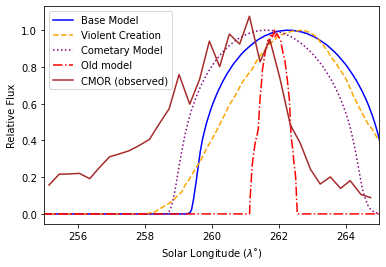

262.2621859821756


In [65]:
cmor = np.genfromtxt("data/cmor.txt", delimiter = ',')
# t2 = t_act

fig = plt.figure()
ax = fig.add_subplot(111)

# x2 = np.array([t2[i*100] for i in range(800)])
x2 = mdates.datestr2num(spice.et2utc(t, "C", 3))

order = np.argsort(long)

peak = np.argmax(cmor[:,1])
d = 1
mean = np.mean(cmor[peak-d:peak+d,1])

plt.plot(long[order]/2/np.pi*360 + 180, r_m4_nv[order]/np.max(r_m4_nv), 
         label = "Base Model", c = 'b')
plt.plot(long[order]/2/np.pi*360 + 180, r_m4_v[order]/np.max(r_m4_v), 
         label = "Violent Creation", c = 'orange', linestyle = "dashed")
# plt.plot(long[order]/2/np.pi*360 + 180, r_m4_d[order]/np.max(r_m4_d), label = "distributed creation", c = 'g')
plt.plot(long[order]/2/np.pi*360 + 180, r_m4_nvc[order]/np.max(r_m4_nvc), 
         label = "Cometary Model", c = 'purple', linestyle = "dotted")
plt.plot(long[order]/2/np.pi*360 + 180, r_m4_nvo[order]/np.max(r_m4_nvo), 
         label = "Old model", c = 'r', linestyle = "dashdot")


# plt.plot([262.15, 262.15], [0,1], "r--", label="peak")


# plt.plot(long[order]/2/np.pi*360 +180, r_m4_nv[order]/np.max(r_m4_nv), label = "1e-4 g min mass")
plt.plot(cmor[:,0], cmor[:,1]/mean, label = 'CMOR (observed)', c = 'brown')
plt.xlim(255,265)


# lns = l1+l2
# labs = [l.get_label() for l in lns]
# ax.legend(lns, labs, loc=0)

# x = mdates.datestr2num("Dec 14, 2018, 11:30 AM")


# plt.plot([x,x], [0, 3e-4], "r--")
# plt.plot([262.2, 262.2], [0,1.1], c = "m")
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%y %H:%M'))
# plt.gcf().autofmt_xdate()
plt.xlabel("Solar Longitude ($\lambda$˚)")
plt.ylabel("Relative Flux")
plt.legend()
plt.savefig("../Figures/Earth-m5r05.png")
plt.show()
print(long[np.argmax(r_m4_nv)]/2/np.pi*360 + 180)

In [61]:
cl_nv = np.inf
cl_v = np.inf
cl_nvo = np.inf
cl_nvc = np.inf

for i,j in enumerate(tqdm(np.linspace(0,19999, n, dtype=int))):
    [pos, lt] = spice.spkezr("EARTH", t_act[j], "J2000", "NONE", "SUN")

    
    pos = spice.convrt(pos, "KM", "AU")
    pos_arr[i] = pos[:3]
    
    d = particles_m4_nv.query(pos[:3])[0]
    cl_nv = np.min([d, cl_nv])
    
    d = particles_m4_v.query(pos[:3])[0]
    cl_v = np.min([d, cl_v])
    
    d = particles_m4_nvo.query(pos[:3])[0]
    cl_nvo = np.min([d, cl_nvo])
    
    d = particles_m4_nvc.query(pos[:3])[0]
    cl_nvc = np.min([d, cl_nvc])

    
print(cl_nv)
print(cl_v)
print(cl_nvo)
print(cl_nvc)

100%|██████████| 8000/8000 [00:41<00:00, 190.87it/s]

0.020215682345757484
0.001941599008459168
0.04880390706048945
0.018310788509513495


In [ ]:
cmor = np.genfromtxt("21_wolf/geminids_zhr/cmor/cmor.txt", delimiter = ',')

fig = plt.figure()
ax = fig.add_subplot(111)

x2 = np.array([t2[i*100] for i in range(800)])
x2 = mdates.datestr2num(spice.et2utc(t, "C", 3))

order = np.argsort(long)

peak = np.argmax(cmor[:,1])
d = 1
mean = np.mean(cmor[peak-d:peak+d,1])

plt.plot(long[order]/2/np.pi*360 + 180, r_m4_nv[order]/np.max(r_m4_nv), label = "base model", c = 'b')
# plt.plot(long[order]/2/np.pi*360 + 180, r_m4_v[order]/np.max(r_m4_v), label = "violent creation", c = 'orange')
# plt.plot(long[order]/2/np.pi*360 + 180, r_m4_d[order]/np.max(r_m4_d), label = "distributed creation", c = 'g')
plt.plot(long[order]/2/np.pi*360 + 180, r_m4_nvc[order]/np.max(r_m4_nvc), label = "base model (comet)", c = 'purple')
plt.plot(long[order]/2/np.pi*360 + 180, r_m4_nvo[order]/np.max(r_m4_nvo), label = "base model (age = 3000)", c = 'r')


# plt.plot([262.15, 262.15], [0,1], "r--", label="peak")


# plt.plot(long[order]/2/np.pi*360 +180, r_m4_nv[order]/np.max(r_m4_nv), label = "1e-4 g min mass")
plt.plot(cmor[:,0], cmor[:,1]/mean, label = 'cmor', c = 'brown')
plt.xlim(255,265)


# lns = l1+l2
# labs = [l.get_label() for l in lns]
# ax.legend(lns, labs, loc=0)

# x = mdates.datestr2num("Dec 14, 2018, 11:30 AM")


# plt.plot([x,x], [0, 3e-4], "r--")
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%y %H:%M'))
# plt.gcf().autofmt_xdate()
plt.legend()
plt.savefig("../Figures/Earth-2.png")
plt.show()
print(long[np.argmax(r_m4_nv)]/2/np.pi*360 + 180)

In [ ]:
cmor = np.genfromtxt("21_wolf/geminids_zhr/cmor/cmor.txt", delimiter = ',')

fig = plt.figure()
ax = fig.add_subplot(111)

x2 = np.array([t2[i*100] for i in range(800)])
x2 = mdates.datestr2num(spice.et2utc(t, "C", 3))

order = np.argsort(long)

peak = np.argmax(cmor[:,1])
d = 1
mean = np.mean(cmor[peak-d:peak+d,1])

plt.plot(long[order]/2/np.pi*360 + 180, r_m4_nv[order]/np.max(r_m4_nv), label = "base model")
plt.plot(long[order]/2/np.pi*360 + 180, r_m4_v[order]/np.max(r_m4_v), label = "violent creation")
# plt.plot(long[order]/2/np.pi*360 + 180, r_m4_d[order]/np.max(r_m4_d), label = "distributed creation")
# plt.plot(long[order]/2/np.pi*360 + 180, r_m4_nvc[order]/np.max(r_m4_nvc), label = "base model (comet)")
# plt.plot(long[order]/2/np.pi*360 + 180, r_m4_nvo[order]/np.max(r_m4_nvo), label = "base model (age = 3000)")


# plt.plot([262.15, 262.15], [0,1], "r--", label="peak")


# plt.plot(long[order]/2/np.pi*360 +180, r_m4_nv[order]/np.max(r_m4_nv), label = "1e-4 g min mass")
plt.plot(cmor[:,0], cmor[:,1]/mean, label = 'cmor')
plt.xlim(255,265)


# lns = l1+l2
# labs = [l.get_label() for l in lns]
# ax.legend(lns, labs, loc=0)

# x = mdates.datestr2num("Dec 14, 2018, 11:30 AM")


# plt.plot([x,x], [0, 3e-4], "r--")
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%y %H:%M'))
# plt.gcf().autofmt_xdate()
plt.legend()
plt.savefig("Figures/Earth-2.png")
plt.show()
print(long[np.argmax(r_m4_nv)]/2/np.pi*360 + 180)

In [ ]:
a = 800
m = 10
n=a*m

nm = 200
pos_arr = np.zeros((n,3))

n_part_m4_v = np.zeros(n)
r_m4_v = np.zeros(n)

n_part_m7_v = np.zeros((n,nm))
r_m7_v = np.zeros(n)

n_part_m4_nv = np.zeros(n)
r_m4_nv = np.zeros(n)

n_part_m7_nv = np.zeros((n,nm))
r_m7_nv = np.zeros(n)

n_part_m4_d = np.zeros(n)
r_m4_d = np.zeros(n)

n_part_m7_d = np.zeros((n,nm))
r_m7_d = np.zeros(n)







n_part_distr = np.zeros(n)
r_distr = np.zeros(n)

r = RADIUS_EARTH/au

t = t_act[np.linspace(0,19999, n, dtype=int)]
long = np.zeros(t.shape[0])
pts1 = points1[points1[:,3] > 1e-7]
pts2 = points2[points2[:,3] > 1e-7]
pts3 = points3[points3[:,3] > 1e-7]
vals = np.linspace(-7,-4,nm)


for i,j in enumerate(tqdm(np.linspace(0,19999, n, dtype=int))):
    [pos, lt] = spice.spkezr("EARTH", t_act[j], "J2000", "NONE", "SUN")

    
    pos = spice.convrt(pos, "KM", "AU")
    pos_arr[i] = pos[:3]


#     n_part_m4_v[i] = len(particles_m4_v.query_ball_point(pos[:3], r))

    idxes1 = particles_m7_nv.query_ball_point(pos[:3], r)
    if idxes1: n_part_m7_nv[i] = [np.sum(pts1[idxes1][:,3] > 10**k) for k in vals]

    idxes2 = particles_m7_v.query_ball_point(pos[:3], r)
    if idxes2: n_part_m7_v[i] = [np.sum(pts2[idxes2][:,3] > 10**k) for k in vals]

    idxes3 = particles_m7_d.query_ball_point(pos[:3], r)
    if idxes3: n_part_m7_d[i] = [np.sum(pts3[idxes3][:,3] > 10**k) for k in vals]        

# #     n_part_distr[i] = len(particles3.query_ball_point(pos[:3], r))

# #     n_part_m4_nv[i] = len(particles_m4_nv.query_ball_point(pos[:3], r))
#     n_part_m7_nv[i] = particles_m7_nv.query_ball_point(pos[:3], r)
    
# #     n_part_m4_d[i] = len(particles_m4_d.query_ball_point(pos[:3], r))
#     n_part_m7_d[i] = particles_m7_d.query_ball_point(pos[:3], r)
    
# #     n_part_a_nv[i] = len(particles_a_nv.query_ball_point(pos[:3], r))

    pos = spice.convrt(pos, "AU", "M")


    V = 4/3 * np.pi * ((r*au)**3)
    
    
    

#     r_m4_v[i] = n_part_m4_v[i]/V *35e3
#     r_m7_v[i] = n_part_m7_v[i]/V *35e3


# # #                     #n/a     #m^-3 #na.         #m^2                                 #m/s
# #     r_distr[i] = n_part_distr[i]/V * norm3 * (np.pi*RADIUS_EARTH**2/au**2) * np.sqrt(np.sum((pos[3:]-earth)**2))
#     r_m4_nv[i] = n_part_m4_nv[i]/V *35e3

#     r_m7_nv[i] = n_part_m7_nv[i]/V *35e3
    
#     r_m4_d[i] = n_part_m4_d[i]/V *35e3
#     r_m7_d[i] = n_part_m7_d[i]/V *35e3
    
#     r_a_nv[i] = n_part_a_nv[i]/V * norm * (np.pi*RADIUS_EARTH**2) * np.sqrt(np.sum((pos[3:]-earth)**2))


    [pos_eclip, lt] = spice.spkezr("EARTH", t_act[j], "ECLIPJ2000", "NONE", "SUN")
    rad, long[i], lat = spice.reclat(pos_eclip[:3])
    
    
    

In [ ]:
maxes_v = np.zeros(vals.size)
maxes_nv = np.zeros(vals.size)
maxes_d = np.zeros(vals.size)


for i in tqdm(range(vals.size)):
#     x2 = np.array([t2[i*100] for i in range(800)])
#     x2 = mdates.datestr2num(spice.et2utc(t, "C", 3))

#     order = np.argsort(long)
#     plt.plot(long[order]/2/np.pi*360 + 180, n_part_m7_v[:,i][order]/np.max(n_part_m7_v[:,i]), label = f"{i}")
#     plt.legend()
#     plt.xlim(255,265)

    maxes_v[i] = long[np.argmax(n_part_m7_v[:,i])]/2/np.pi*360 + 180
    maxes_nv[i] = long[np.argmax(n_part_m7_nv[:,i])]/2/np.pi*360 + 180
    maxes_d[i] = long[np.argmax(n_part_m7_d[:,i])]/2/np.pi*360 + 180


plt.plot(vals, maxes_nv, label = "Base Model")
plt.plot(vals, maxes_v, label = "Violent Creation")
plt.plot(vals, maxes_d, label = "Distributed Creation")
plt.xlabel("$\log_{10}$ (Limiting Mass (g))")
plt.ylabel("Solar Longitude ($^\circ$)")
plt.legend()
plt.savefig("Figures/lim_mass_peak_time.png")




In [ ]:
vals

In [ ]:
10**vals

In [ ]:
points_m7.shape

In [ ]:
n_part_m7_v

In [ ]:
points2.shape()

In [ ]:
n_part_m7_v[n_part_m7_v[:,0]>0]

In [ ]:
plt.hexbin(points1o[:,0], points1o[:,1])
points1o.shape

In [ ]:
plt.hexbin(points3[:,0], points3[:,1])
points1.shape